<a href="https://colab.research.google.com/github/koksal100/NLP/blob/main/Using_Glove_Embedding_Sentiment_Analysis_With_Gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Veri setini yükleyin
max_features = 20000  # Kullanılacak en sık kelime sayısı
max_len = 500  # Her inceleme için maksimum uzunluk

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


17464789/17464789 [==============================] - 2s 0us/step
Training data shape: (25000, 500)
Testing data shape: (25000, 500)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2024-06-23 22:02:21--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-23 22:02:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.12MB/s    in 2m 41s  

2024-06-23 22:05:04 (5.10 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [10]:
!unzip /content/glove.6B.zip -d /content/glove.6B


Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B/glove.6B.50d.txt  
  inflating: /content/glove.6B/glove.6B.100d.txt  
  inflating: /content/glove.6B/glove.6B.200d.txt  
  inflating: /content/glove.6B/glove.6B.300d.txt  


In [11]:
import numpy as np

# GloVe dosyasının yolunu belirtin
glove_file = '/content/glove.6B/glove.6B.100d.txt'

# Kelime vektörlerini yükleyin
embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")


Found 400000 word vectors.


In [12]:
# Embedding matrisini oluşturun
embedding_dim = 100
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, index in imdb.get_word_index().items():
    if index < max_features:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector


In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeli oluşturun
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len,
                    weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          2000000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 500, 128)          84480     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 500, 128)          0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

Epoch 1/20
313/313 [==============================] - 33s 81ms/step - loss: 0.6885 - accuracy: 0.5489 - val_loss: 0.6739 - val_accuracy: 0.5834
Epoch 2/20
  2/313 [..............................] - ETA: 21s - loss: 0.6422 - accuracy: 0.7266

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 18s 58ms/step - loss: 0.6532 - accuracy: 0.6134 - val_loss: 0.6225 - val_accuracy: 0.6576
Epoch 3/20
313/313 [==============================] - 34s 109ms/step - loss: 0.6237 - accuracy: 0.6509 - val_loss: 0.5977 - val_accuracy: 0.6704
Epoch 4/20
313/313 [==============================] - 19s 60ms/step - loss: 0.5808 - accuracy: 0.6899 - val_loss: 0.5592 - val_accuracy: 0.7074
Epoch 5/20
313/313 [==============================] - 24s 76ms/step - loss: 0.5407 - accuracy: 0.7278 - val_loss: 0.5970 - val_accuracy: 0.6678
Epoch 6/20
313/313 [==============================] - 20s 65ms/step - loss: 0.4976 - accuracy: 0.7599 - val_loss: 0.5357 - val_accuracy: 0.7200
Epoch 7/20
313/313 [==============================] - 23s 74ms/step - loss: 0.4520 - accuracy: 0.7893 - val_loss: 0.5045 - val_accuracy: 0.7534
Epoch 8/20
313/313 [==============================] - 22s 72ms/step - loss: 0.4170 - accuracy: 0.8096 - val_loss: 0.4884 - val_accuracy: 0.7762
Ep

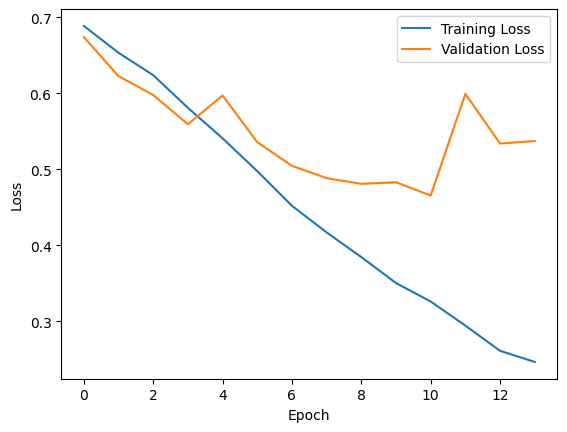

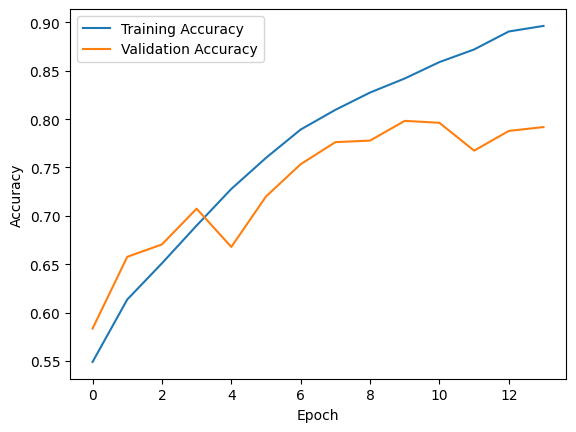

In [14]:
# Modeli eğitin
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Modeli test edin
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Kullanıcı Cümlesi ile Tahmin Yapma
word_index = imdb.get_word_index()
user_sentence = "I love this movie, it is fantastic"
user_sentence_tokens = user_sentence.lower().split()
user_sentence_indices = [word_index.get(word, 0) for word in user_sentence_tokens]
padded_user_sentence = pad_sequences([user_sentence_indices], maxlen=max_len)

prediction = model.predict(padded_user_sentence)
print("Prediction (Probability):", prediction)
print("Sentiment:", "Positive" if prediction >= 0.5 else "Negative")

# Eğitim ve Doğrulama Sonuçlarını Görselleştirme
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Örnek cümleler
sentences = [
    "This movie was fantastic! I loved every bit of it.",
    "The plot was confusing and the acting was terrible.",
    "I'm not sure how I feel about this film.",
    "The ending was unexpected and left me speechless.",
    "I would recommend this movie to everyone!",
    "The cinematography was stunning but the story fell flat.",
    "The characters were well-developed and the dialogue was engaging.",
    "I couldn't get into the story and found it boring.",
    "The movie exceeded my expectations.",
    "Overall, I think this was a mediocre film."
]

# Tokenization ve padding işlemleri
max_len = 100  # Örnek maksimum cümle uzunluğu
user_sentences_indices = []
for sentence in sentences:
    sentence_tokens = sentence.lower().split()
    sentence_indices = [word_index.get(word, 0) for word in sentence_tokens]
    user_sentences_indices.append(sentence_indices)

padded_user_sentences = pad_sequences(user_sentences_indices, maxlen=max_len)

# Tahminler
predictions = model.predict(padded_user_sentences)

# Sonuçları yazdırma
for i, sentence in enumerate(sentences):
    sentiment = "Positive" if predictions[i] >= 0.5 else "Negative"
    print(f"Cümle: '{sentence}'")
    print(f"Tahmin (Olabilirlik): {predictions[i]}")
    print(f"Sentiment: {sentiment}\n")



1/1 [==============================] - 0s 39ms/step
Cümle: 'This movie was fantastic! I loved every bit of it.'
Tahmin (Olabilirlik): [0.17265372]
Sentiment: Negative

Cümle: 'The plot was confusing and the acting was terrible.'
Tahmin (Olabilirlik): [0.6796857]
Sentiment: Positive

Cümle: 'I'm not sure how I feel about this film.'
Tahmin (Olabilirlik): [0.02178732]
Sentiment: Negative

Cümle: 'The ending was unexpected and left me speechless.'
Tahmin (Olabilirlik): [0.0184419]
Sentiment: Negative

Cümle: 'I would recommend this movie to everyone!'
Tahmin (Olabilirlik): [0.978214]
Sentiment: Positive

Cümle: 'The cinematography was stunning but the story fell flat.'
Tahmin (Olabilirlik): [0.02083348]
Sentiment: Negative

Cümle: 'The characters were well-developed and the dialogue was engaging.'
Tahmin (Olabilirlik): [0.80943155]
Sentiment: Positive

Cümle: 'I couldn't get into the story and found it boring.'
Tahmin (Olabilirlik): [0.20633328]
Sentiment: Negative

Cümle: 'The movie exce